---
title: "Cross entropy — Part 1: Introduction and definitions"
date: 2021-02-23
categories: [statistics, entropy]
tags: [statistics, entropy, cross entropy]
preview_image: /enrightward.github.io/assets/img/cross-entropy/blue-white-paint.jpg
---

![Desktop View](/assets/img/cross-entropy/blue-white-paint.jpg)

## 1. Introduction

In this post, I discuss the _cross entropy_ $H(p, q)$ of two discrete PDFs $p$ and $q$. It is a loose measure of similarity of $p$ and $q$, and so is used in machine learning to define objective functions for tasks where the goal is to learn a PDF $p$ implicit in training data by updating the internal parameters of a learnt PDF $q$. After explaining this application in more detail, I: 

* Recall the definitions of _entropy_ and _cross entropy_ ;
* Use numpy to do some example computations using cross entropy, and; 
* Write down a proof that for fixed but arbitrary $p$, the function $q \mapsto H(p, q)$ obtains a global minimum at $q = p$.

This last point both suggests that cross entropy measures similarity.

## 2. Why is cross entropy useful in machine learning?

The above-mentioned global minimum $q = p$ of $q \mapsto H(p, q)$ suggests that cross entropy is a measure of closeness between $p$ and $q$. This is not true in the strict sense of being a [metric à la pure mathematics](https://en.wikipedia.org/wiki/Metric_(mathematics)#Definition) (in general, $H(p, p)$ is not zero, and 
$H(p, q)$ and $H(q, p)$ are different), but it is true enough to be useful in machine learning. Before jumping into details, let me give an example of this usefulness.

In language modelling, the goal is to train the machine to predict the next word in a sentence, given the preceding ones. The sentence might be:

> "the cat sat on the \[mat\]".

The machine would have to predict "mat", given the other words. Cross entropy enters the picture when one formalises this task, by defining: 

* The PDF $p$ to be the mythical PDF that always predicts the right answer — formally, it is the "one-hot" PDF $p$ over all words in the English language defined by $p(\textrm{mat}) = 1$ and $p(w) = 0$ for all other words $w$ — and
* The PDF $q$ to be the machine's best guess about the next word, based on the text it has seen so far.

Under the hood, $q$ often depends on many, many parameters, which the machine can alter. The machine's learning task is to update these parameters to make $q$ as "close" to $p$ as possible. Here, people can and often do define "close" to mean the cross entropy $H(p, q)$ is as small as possible.

## 3. TL;DR: 
Cross entropy is often used in machine learning to define an objective function that measures the difference between a mythical, always-correct PDF $p$ (which in practice is approximated from the data), and the machine's best-guess PDF $q$.

## 4. A quick introduction to entropy

Suppose $p$ is a discrete PDF with support ("outcome space") $S = \{ x_{1}, \ldots, x_{n} \}$. The _entropy_ of $p$ is defined to be:

\begin{equation}
H(p) := \sum_{i=1}^{n} p(x_{i}) \log \left( \frac{1}{p(x_{i})} \right) = -\sum_{i=1}^{n} p(x_{i}) \log(p(x_{i})),
\end{equation}

provided none of the $p(x_{i})$ is zero. If $p(x_{i}) = 0$ for some $i$, then we declare by fiat that the summand $p(x_{i}) \log(p(x_{i}))$ is zero. One justification for this is that:

\begin{equation}
\lim_{x \rightarrow 0^{+}} x \log x = 0.
\end{equation}

The quantity $s(x_{i}) := \log(1/p(x_{i}))$ is called the _surprisal_ of the outcome $x_{i}$. It quantifies the "information" associated to $x_{i}$ — lower probability events are more surprising, hence their occurrence more informative. [Shannon's Source Coding Theorem](https://en.wikipedia.org/wiki/Shannon%27s_source_coding_theorem#:~:text=In%20information%20theory%2C%20Shannon's%20source,meaning%20of%20the%20Shannon%20entropy.&text=However%20it%20is%20possible%20to,with%20negligible%20probability%20of%20loss.) states that, if the logarithm is base 2, then $s(x_{i})$ approximates the length in bits of an optimal, lossless binary encoding for a message written in the outcome space alphabet $x_{i}$ and whose characters appear in this message with probabilities defined by $p$. 

## 5. Cross entropy

I won't talk more about entropy in this blog — instead I discuss _cross entropy_. Let $q$ be a second PDF with the same support $S$. Then the _cross entropy_ of the pair $(p, q)$ is defined to be:

\begin{equation}
H(p, q) := -\sum_{i=1}^{n} p(x_{i}) \log(q(x_{i})).
\end{equation}

This is not a symmetric quantity: $H(p, q)$ and $H(q, p)$ are different in general. We'll see this by computing examples. To do this, we first define two python functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cross_entropy(p, q):
    """Require that p and q are numpy arrays"""
    result = -p.dot(np.log(q))
    return result

def random_discrete_pdf(length):
    """Compute a random multinomial 
    PDF with `length` entries"""
    # Generate `length` random numbers between 0 and 1.
    pdf = np.random.rand(length)
    # normalise, so it's a pdf
    pdf = pdf/pdf.sum()
    return pdf

Taking $p$ and $q$ to be two randomly-generated PDFs of length five, we have:

In [2]:
length = 5
p = random_discrete_pdf(length)
q = random_discrete_pdf(length)
print('p =', p)
print('q =', q)
print()
print('H(p, q) = {:0.3f}'.format(cross_entropy(p, q)))
print('H(q, p) = {:0.3f}'.format(cross_entropy(q, p)))

p = [0.08669807 0.24134156 0.32611669 0.16300244 0.18284124]
q = [0.17582746 0.02024274 0.29378282 0.14374014 0.36640684]

H(p, q) = 1.991
H(q, p) = 1.671


Now let's keep $p$ fixed, and compute $H(p, q)$ for randomly-generated $q$:

In [3]:
N = 1000000
hpqs = []

for _ in range(N):
    q = random_discrete_pdf(length)
    hpq = cross_entropy(p, q)
    hpqs.append(hpq)
    
hpqs = np.array(hpqs)

We plot the $H(p, q)$'s in a histogram, to get a sense of the distribution.

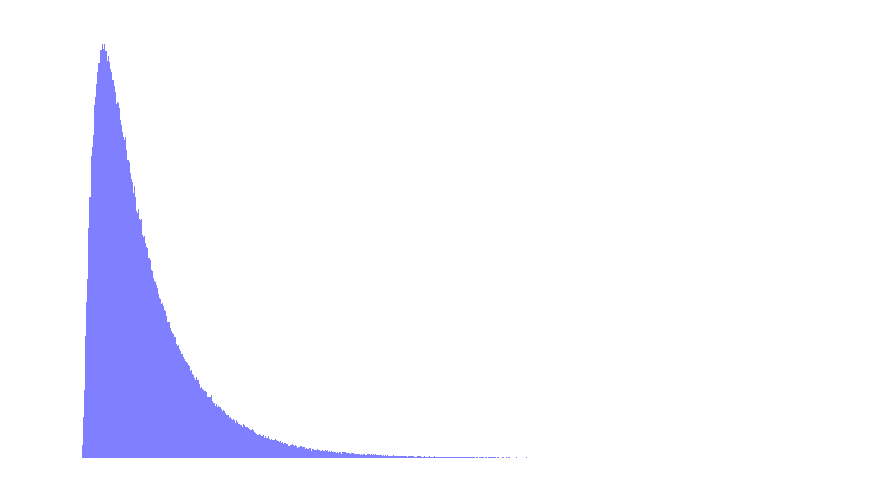

In [4]:
num_bins = 1000

fig, ax = plt.subplots(figsize=(15, 8))
n, bins, patches = plt.hist(hpqs, num_bins, density=1, facecolor='blue', alpha=0.5)

colour = 'white'

ax.spines['bottom'].set_color(colour)
ax.spines['top'].set_color(colour)
ax.spines['left'].set_color(colour)
ax.spines['right'].set_color(colour)
ax.xaxis.label.set_color(colour)
ax.yaxis.label.set_color(colour)
ax.title.set_color(colour)
ax.tick_params(axis='x', colors=colour)
ax.tick_params(axis='y', colors=colour)

plt.xlabel('H(p, q)')
plt.ylabel('Frequency')
plt.title(r'Distribution of H(p, q)')
plt.show()

![png](/assets/img/cross-entropy/hpq_histogram.png)

There appears to be a hard cut-off around $1 \le H(p, q) \le 2$, below which there are no samples. What's going on? It turns out this lower bound is $H(p, p)$. Empirically, this looks correct:

In [6]:
print('H(p, p) = {:0.3f}'.format(cross_entropy(p, p)))

H(p, p) = 1.527


## 6. Proof that $q = p$ minimises $p \mapsto H(p, q)$

The goal is to show that for a fixed discrete PDF $p$, $H(p, p) \le H(p, q)$ for all PDFs $q$ with the same support as $p$. We use the following fact: Since $y = x - 1$ is the tangent at $x = 1$ to the convex function $y = \log(x)$, we have:

\begin{equation}
\log(x) \le x - 1,
\end{equation}

for all $x \ge 0$. To ease notation, write $p_{i} := p(x_{i})$ for all $1 \le i \le n$, and define $I := \{ 1 \le i \le n \mid p_{i} \neq 0 \}$. Then:

\begin{equation}
\sum_{i \in I} p_{i} \log \left( \frac{q_{i}}{p_{i}} \right) \le^{\textrm{(a)}}
\sum_{i \in I} p_{i} \left(\frac{q_{i}}{p_{i}} - 1 \right) = \\
\sum_{i \in I} q_{i} - \sum_{i \in I} p_{i} =^{\textrm{(b)}} 
\left( \sum_{i \in I} q_{i} \right) - 1 \le^{\textrm{(c)}} 0.
\end{equation}

Here, the inequality (a) follows from the log inequality above, and the equality (b) holds because the sum of $p_{i}$ over $I$ is 1. Since the sum of $q_{i}$ over $I$ may be less than 1, inequality (c) holds. So we've shown that:

\begin{equation}
0 \ge \sum_{i \in I} p_{i} \log \left( \frac{q_{i}}{p_{i}} \right) = 
\sum_{i \in I} p_{i} \log (q_{i}) - \sum_{i \in I} p_{i} \log (p_{i}),
\end{equation}

but this implies that:

\begin{equation}
H(p, p)  = - \sum_{i \in I} p_{i} \log (p_{i}) \le -\sum_{i \in I} p_{i} \log (q_{i}) = H(p, q).
\end{equation}

## 7. Roundup 

We introduced the notion of cross entropy, and noted its usefulness in machine learning as an objective function measuring the difference between an ideal PDF $p$ implicit in a data set, and a learnt, parametrised PDF $q$. This has particular applications in language modelling. We then wrote down a proof that for fixed but arbitrary $p$, the function $q \mapsto H(p, q)$ obtains a global minimum at $q = p$. In the [next post](https://enrightward.github.io/enrightward.github.io/posts/cross-entropy-part-2/), we will show, with the help of the softmax parametrisation, that this function is convex, so can be optimised via a gradient descent algorithm.